In [ ]:
def solution(lottos, win_nums):
    answer = []
    num_zero = lottos.count(0)

    lottos = set(lottos) 
    win_nums = set(win_nums)

    corrcet = lottos & win_nums

    best = len(corrcet)+num_zero
    worst = len(corrcet)

    best_rank = min(7-best,6)    # best=0 -> rank=7 될 수 있어서
    worst_rank = min(7-worst,6)  # worst=0 -> rank=7 될 수 있어서

    answer.append(best_rank)
    answer.append(worst_rank)
    return answer

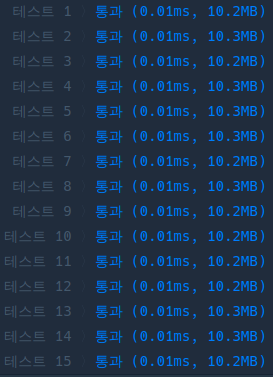

In [20]:
from collections import defaultdict
def solution(enroll, referral, seller, amount):
    state_dict = dict(zip(enroll,referral))  # {'john': '-', 'mary': '-', 'edward': 'mary', 'sam': 'edward', 'emily': 'mary', 'jaimie': 'mary', 'tod': 'jaimie', 'young': 'edward'}
    profit_dict = defaultdict(int)           # {'john': 0, 'mary': 0, 'edward': 0, 'sam': 0, 'emily': 0, 'jaimie': 0, 'tod': 0, 'young': 0}
    answer = []

    for _ in enroll:
        profit_dict[_]=0 
        
    for idx, money in enumerate(amount):
        current_seller = seller[idx]     # 현재 계산하고자 하는 판매원
        recommend = state_dict[current_seller]   # 그 판매원을 소개한 사람
        
        seller_money = money*100         # 판매원이 번 돈
        recommend_profit = int(seller_money*0.1) # 소개한 사람한테 줄 돈
        sellers_profit = seller_money - recommend_profit 
        
        profit_dict[current_seller] += sellers_profit
        
        while recommend != '-' and recommend_profit >=1:  # 더 이상의 소개한 사람이 없거나 1원 단위 이하로 내려가면 탈출
            seller_money = recommend_profit 
            recommend_profit = int(seller_money*0.1)
            seller_profit = seller_money - recommend_profit
            
            current_seller, recommend = state_dict[current_seller], state_dict[recommend] # 한단계 위 트리로 이동
            profit_dict[current_seller] += seller_profit 
    
    answer.append(profit_dict.values())

    
    return answer


In [21]:
case1 = [["john", "mary", "edward", "sam", "emily", "jaimie", "tod", "young"],
         ["-", "-", "mary", "edward", "mary", "mary", "jaimie", "edward"],
         ["young", "john", "tod", "emily", "mary"], [12, 4, 2, 5, 10], [360, 958, 108, 0, 450, 18, 180, 1080]]
case2 = [["john", "mary", "edward", "sam", "emily", "jaimie", "tod", "young"],
         ["-", "-", "mary", "edward", "mary", "mary", "jaimie", "edward"],
         ["sam", "emily", "jaimie", "edward"], [2, 3, 5, 4], [0, 110, 378, 180, 270, 450, 0, 0]]
for enroll, referral, seller, amount, ans in [case1, case2]:
    print(f'enroll: {enroll}\nreferral: {referral}\nseller: {seller}\nans: {ans}')
    print(f'Ans: {solution(enroll, referral, seller, amount)}\n')

enroll: ['john', 'mary', 'edward', 'sam', 'emily', 'jaimie', 'tod', 'young']
referral: ['-', '-', 'mary', 'edward', 'mary', 'mary', 'jaimie', 'edward']
seller: ['young', 'john', 'tod', 'emily', 'mary']
ans: [360, 958, 108, 0, 450, 18, 180, 1080]
defaultdict(<class 'int'>, {'john': 360, 'mary': 958, 'edward': 108, 'sam': 0, 'emily': 450, 'jaimie': 18, 'tod': 180, 'young': 1080})
Ans: [dict_values([360, 958, 108, 0, 450, 18, 180, 1080])]

enroll: ['john', 'mary', 'edward', 'sam', 'emily', 'jaimie', 'tod', 'young']
referral: ['-', '-', 'mary', 'edward', 'mary', 'mary', 'jaimie', 'edward']
seller: ['sam', 'emily', 'jaimie', 'edward']
ans: [0, 110, 378, 180, 270, 450, 0, 0]
defaultdict(<class 'int'>, {'john': 0, 'mary': 110, 'edward': 378, 'sam': 180, 'emily': 270, 'jaimie': 450, 'tod': 0, 'young': 0})
Ans: [dict_values([0, 110, 378, 180, 270, 450, 0, 0])]



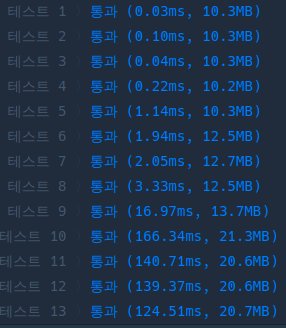